## Calibrating Camera Images
### Using Computer Vision Techniques

In this notebook we'll craft a computer vision process for calibrating camera images, for removing distortion with lense correction.

In [1]:
# Import libraries
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define paths
calib_path = "./calibration_images/"
test_path = "./test_images/"

In [3]:
# plotting function for images
def plot(images, no_rows, no_cols, width = 10., height = 4., color='gray'):
    fig = plt.figure(1, (width, height))
    i = 0
    
    for image in images:
        sub = fig.add_subplot(no_rows, no_cols, i + 1)
        sub.imshow(image, color)
        sub.axis("off")
        i += 1

    plt.show()

In [4]:
# Populate images
import os
calib_files = os.listdir(calib_path)
test_files = os.listdir(test_path)

print("Calibration images: {}".format(calib_path))

Calibration images: ./calibration_images/


In [5]:
img_shape = mpimg.imread(os.path.join(calib_path, calib_files[0])).shape
print("Image shape: [{}]".format(img_shape))

Image shape: [(720, 1280, 3)]


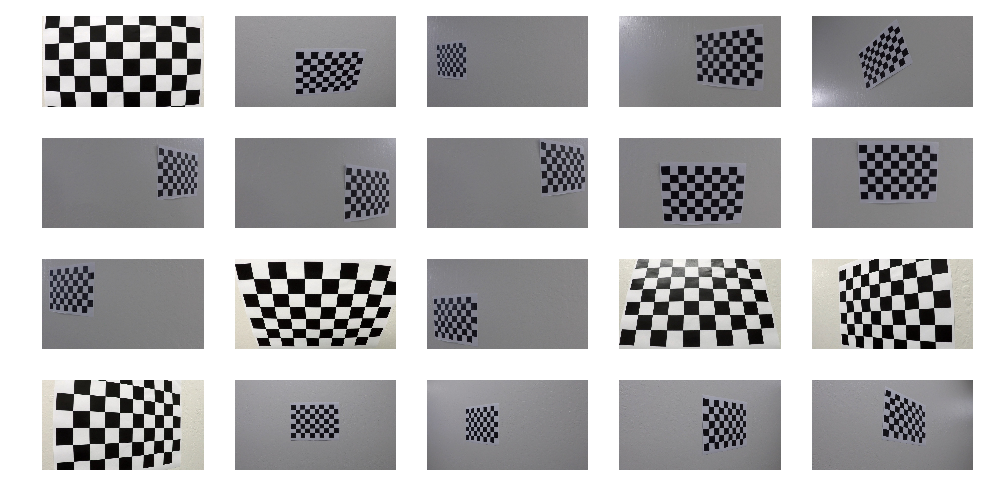

In [6]:
# plot some calibration images
calib_images = [mpimg.imread(os.path.join(calib_path, x)) for x in calib_files]
plot(calib_images, 4, 5, width = 12., height = 6.)

In [7]:
# Define chessboard parameters
nb_cornerx = 9
nb_cornery = 6

In [8]:
# Define corner detection

def find_corners(img, dimensions):
    # Define translation and distortion parameters
    objpoints = []
    imgpoints = []
    
    objp = np.zeros((dimensions[1] * dimensions[0], 3), np.float32)
    objp[:,:2] = np.mgrid[0:dimensions[0], 0:dimensions[1]].T.reshape(-1, 2) # x,y coordinates
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    [ret, corners] = cv2.findChessboardCorners(gray, dimensions, None)
    
    return [ret, objp, corners]

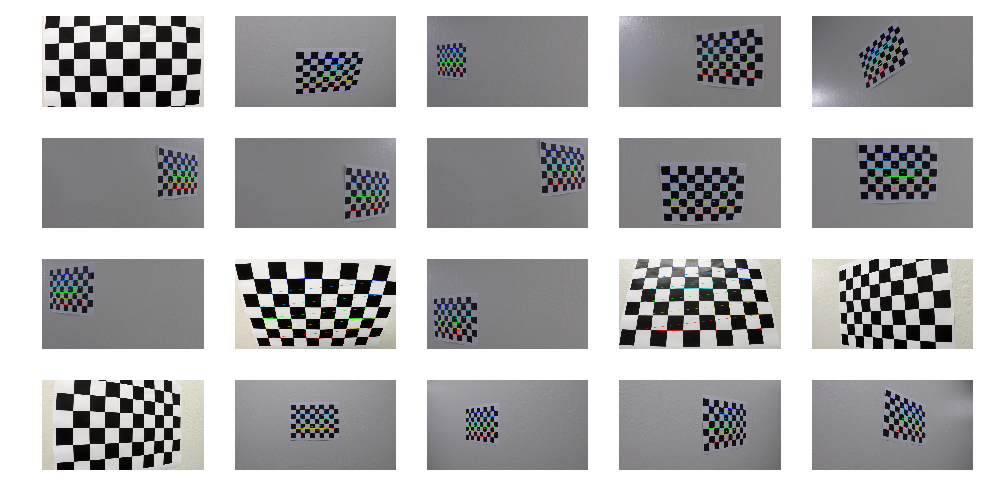

In [9]:
# find corners in calibration images and plot them

sampled_images = []

def process_image(img):
    
    [ret, objpoints, corners] = find_corners(img, (nb_cornerx, nb_cornery))
    if (ret == True):
        img = cv2.drawChessboardCorners(img, (nb_cornerx, nb_cornery), corners, ret)
    
    return img

for x in calib_files:
    img = mpimg.imread(os.path.join(calib_path, x))
    img = process_image(img)
    
    sampled_images.append(img)

plot(sampled_images, 4, 5, 12., 6.)

In [10]:
### Define calibration and distortion methods ###

# calibrate camera using chessboard calibration images
def calibrate_camera(images):
    objpoints = []
    imgpoints = []
    
    for img in images:
        img_size = (img.shape[1], img.shape[0])
        
        [ret, points, corners] = find_corners(img, (nb_cornerx, nb_cornery))
        
        if (ret == True):
            objpoints.append(points)
            imgpoints.append(corners)
    
    [ret, mtx, dist, rvecs, tvecs] = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)    
    
    return [mtx, dist]

# undistort images using translation coefficients
def undistort(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)

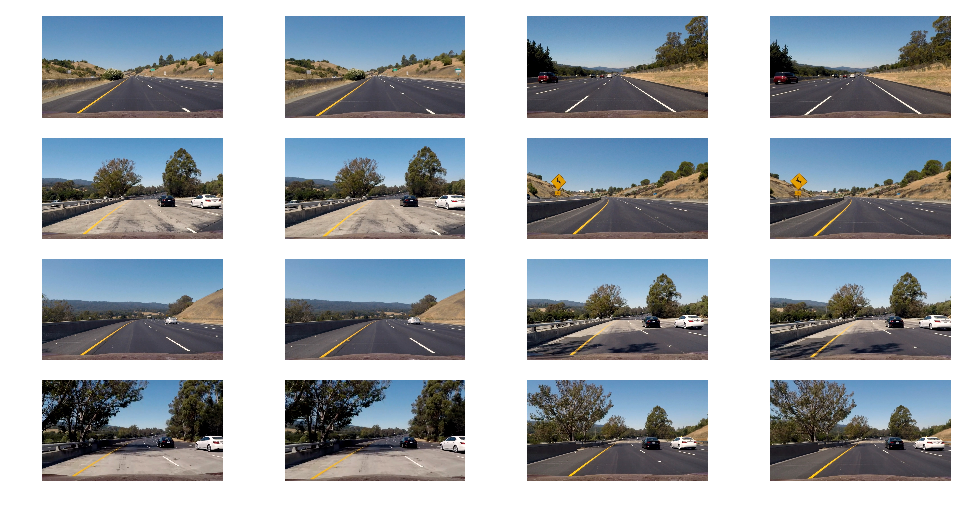

In [11]:
# test undistortion on images

test_sampled = []

# calibrate camera
[mtx, dist] = calibrate_camera(calib_images)

for x in test_files:
    img = mpimg.imread(os.path.join(test_path, x))
    
    undistorted = undistort(img, mtx, dist)
    
    test_sampled.append(img)
    test_sampled.append(undistorted)

plot(test_sampled, 4, 4, 12., 6.)